In [1]:
from imp import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns

from lib import IO
from lib import Loader
from lib import graph
from lib import pt_utils

plt.rcParams['figure.dpi'] = 100

reload(Loader)
reload(graph)
reload(IO)
la = Loader.LALoader()
bjh = Loader.BJLoader('highway')
bjm = Loader.BJLoader('metro')

### adj heatmap

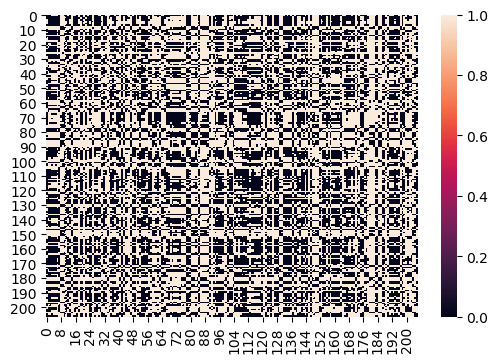

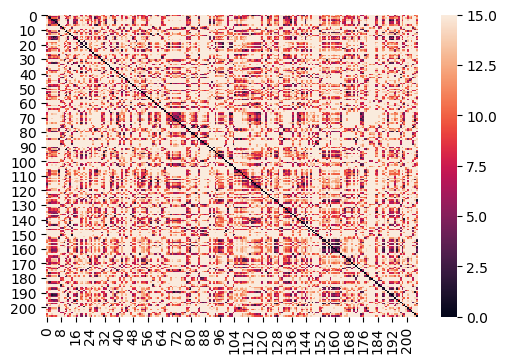

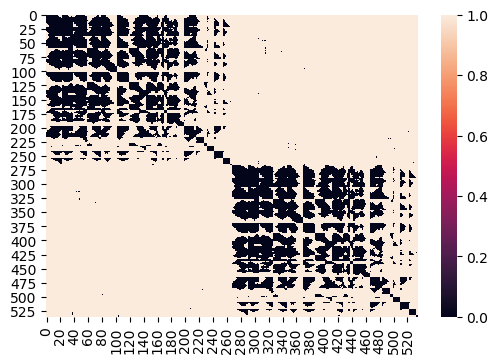

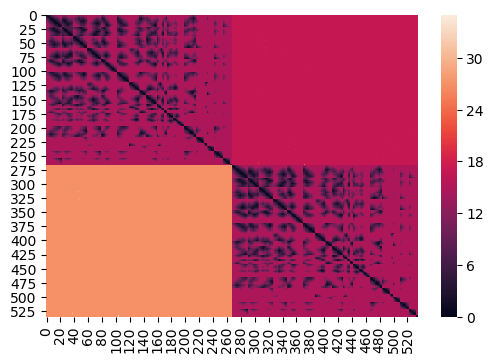

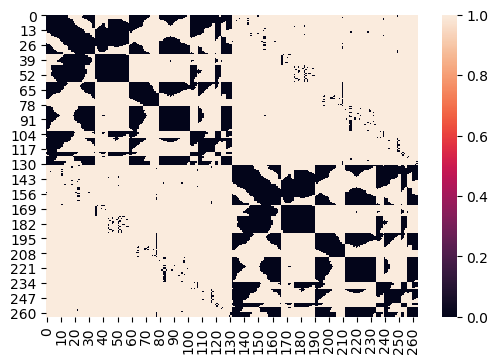

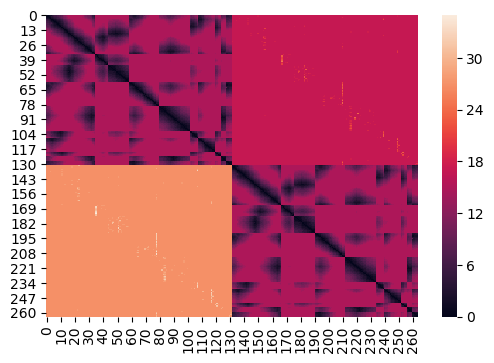

In [79]:
reload(pt_utils)
reload(graph)
for dataset in ['LA', 'BJ_metro', 'BJ_highway']:
    adj, mask = pt_utils.load_adj_long(dataset)
    sns.heatmap(mask)
    plt.show()
    sns.heatmap(adj)
    plt.show()

### digitized ods' distributions

D:\Projects\ST_Attention\lib\graph.py:79: RuntimeWarning: invalid value encountered in true_divide
  do_ = od.transpose() / od.sum(1)
D:\Projects\ST_Attention\lib\graph.py:80: RuntimeWarning: invalid value encountered in true_divide
  return od_, do_
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.0145202020202


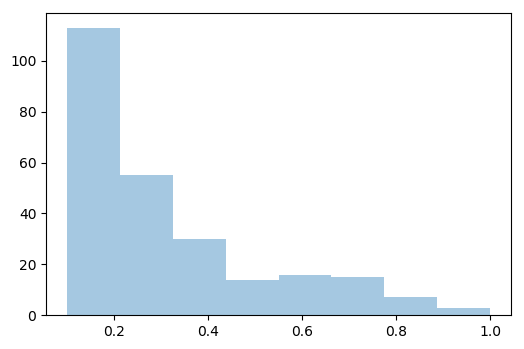

0.000153152149699


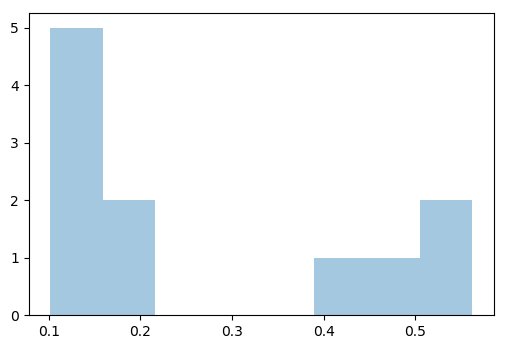

In [54]:
reload(graph)
for loader in [bjh, bjm]:
    od = loader.load_od()
    od, do = graph.calculate_od_adj(od)
    values = od.reshape(-1)
    index = values > 0.1
    print(sum(index) / len(index))
    sns.distplot(values[index], bins=8, kde=False)
    plt.show()

### time series scaled distributions for LA, BJ_highway, BJ_metro

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


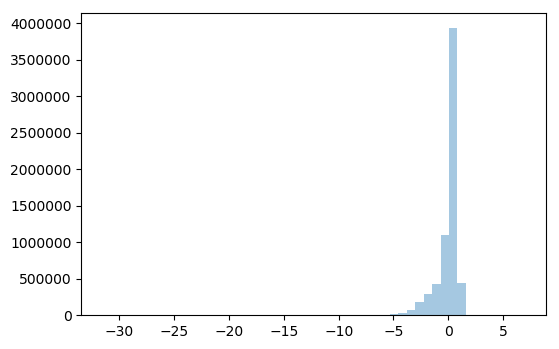

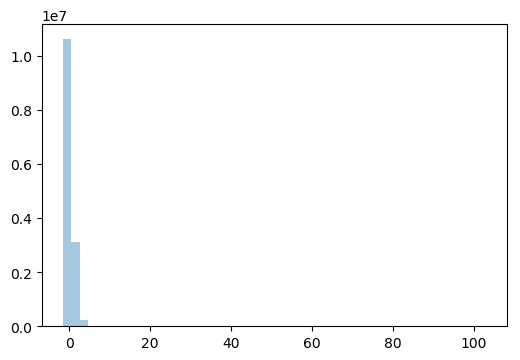

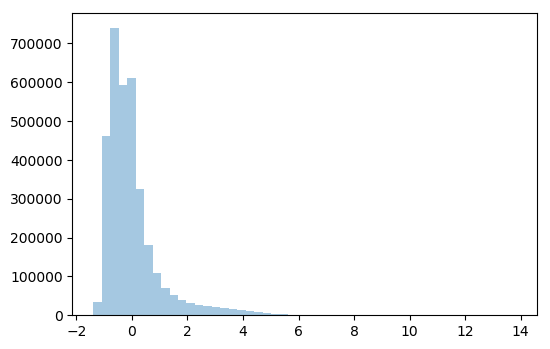

In [7]:
def scale(ts):
    return (ts - ts.mean()) / (ts.std() + 1e-8)

for loader in [la, bjh, bjm]:
    ts = loader.load_ts()
    if loader is la:
        ts[ts == 0] = np.nan
    plt.figure()
    values = scale(ts).values.reshape(-1)
    values = values[~np.isnan(values)]
    sns.distplot(values, kde=False)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


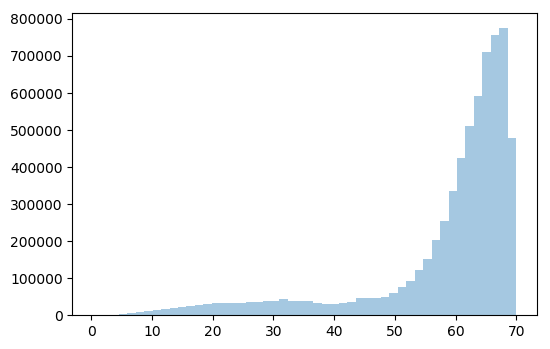

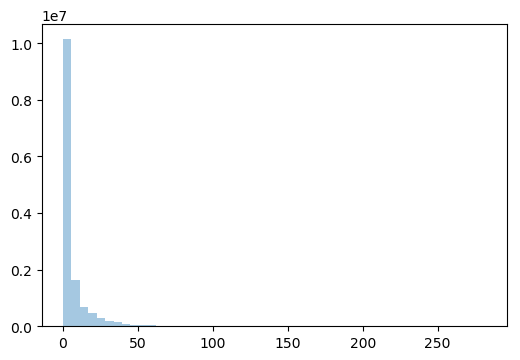

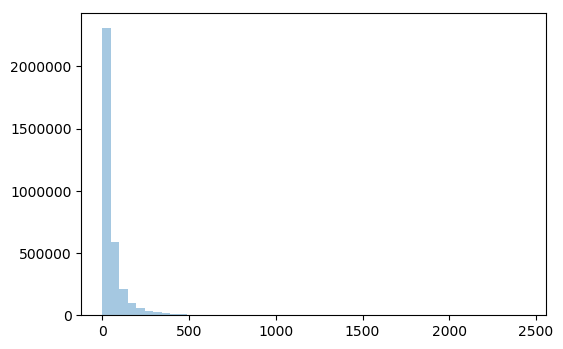

In [8]:
for loader in [la, bjh, bjm]:
    ts = loader.load_ts()
    if loader is la:
        ts[ts == 0] = np.nan
    plt.figure()
    values = ts.values.reshape(-1)
    values = values[~np.isnan(values)]
    sns.distplot(values, kde=False)
    plt.show()

### distance and hops distributions

C:\Users\shawnwan47\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


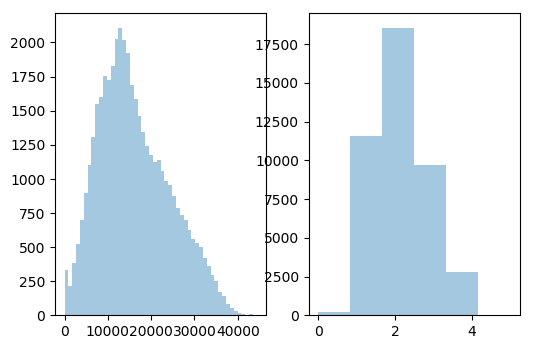

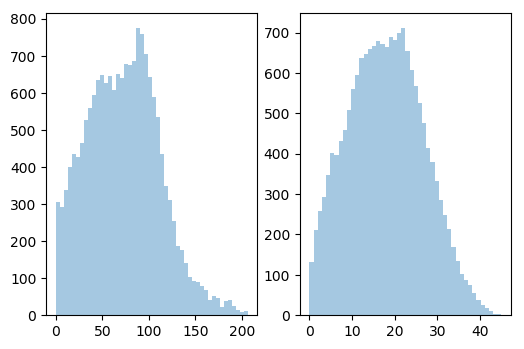

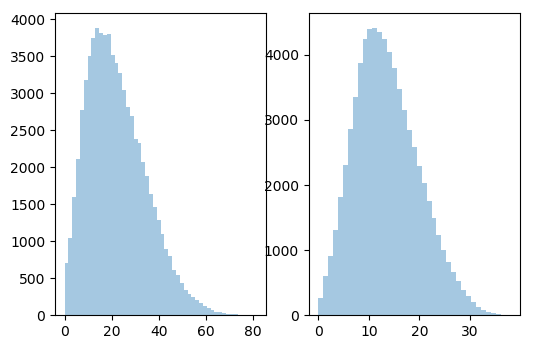

In [9]:
def show_dist_hop(dist, hop):
    plt.figure()
    plt.subplot(121)
    sns.distplot(dist.values.reshape(-1), kde=False)
    plt.subplot(122)
    sns.distplot(hop.values.reshape(-1), kde=False, bins=hop.max().max() + 1)

for loader in [la, bjh, bjm]:
    dist = loader.load_dist()
    hop = loader.load_hop()
    show_dist_hop(dist, hop)
    
plt.show()


## correlation of flow

773869    3843
767541    2149
767542    2149
717447    2174
717446    2463
717445    2183
773062    2176
767620    3257
737529    2684
717816    2313
765604    2406
767471    4075
716339    2207
773906    2649
765273    2185
716331    2232
771667    2867
716337    2172
769953    2268
769402    2255
769403    2290
769819    2271
769405    5346
716941    2840
717578    2220
716960    3050
717804    3726
767572    2260
767573    2257
773012    2248
          ... 
767554    2255
773975    2181
773974    2165
717510    5156
717513    4819
717825    2153
767495    3316
767494    2205
717821    2322
717823    2158
717458    2166
717459    2157
769926    2732
764858    2171
717450    2308
717452    2174
717453    2217
759772    3752
717456    2258
771673    2884
772167    2290
769372    2194
774204    3645
769806    2171
717590    3105
717592    3097
717595    2264
772168    2150
718141    2526
769373    2170
Length: 207, dtype: int64

In [54]:
index = ts.index
time0 = index.time[0]
import datetime
isinstance(time0, datetime.time)

True

In [31]:
ts[773869].cor

AttributeError: 'Series' object has no attribute 'corrwith'

In [ ]:
for loader in [la, bjm, bjh]:
    ts = loader.load_ts()
    